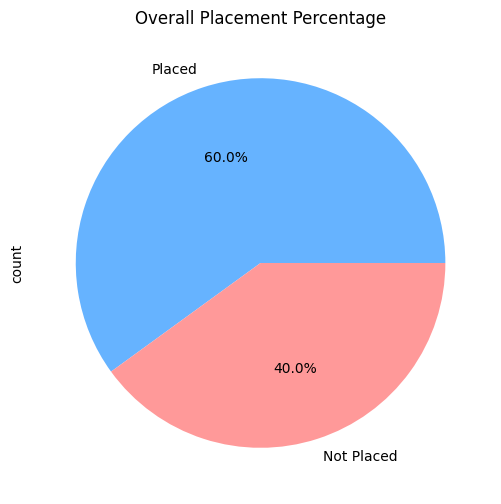

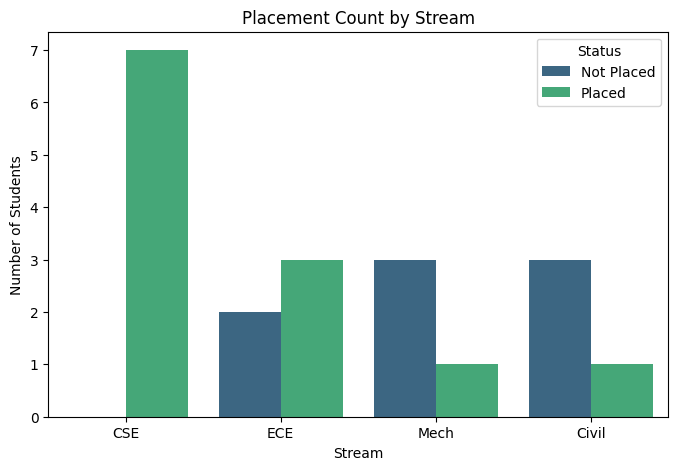

------------------------------------------------
Model Accuracy: 83.33%
------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

  Not Placed       1.00      0.50      0.67         2
      Placed       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

------------------------------------------------


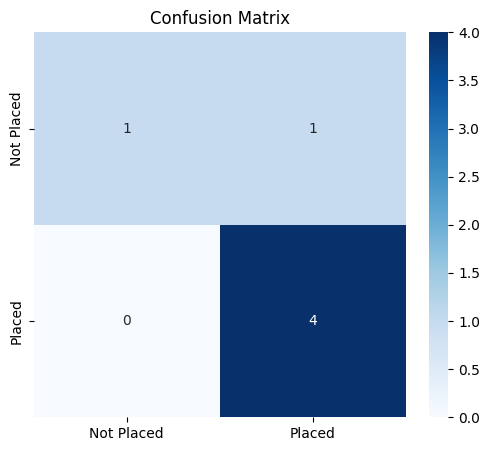

Model expects features in this order: ['Gender', 'CGPA', 'Internships', 'Backlogs', 'Stream']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================
# STEP 1: LOAD & PREPARE DATA
# ==========================================
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'CGPA': [8.5, 7.2, 6.0, 9.1, 5.5, 8.8, 7.5, 6.8, 9.5, 6.2, 8.1, 5.9, 9.3, 7.1, 8.9, 6.5, 7.8, 9.0, 5.8, 8.2],
    'Internships': [1, 0, 0, 2, 0, 3, 1, 0, 2, 0, 2, 0, 3, 1, 2, 0, 1, 2, 0, 2],
    'Backlogs': [0, 0, 2, 0, 3, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0],
    'Stream': ['CSE', 'ECE', 'Mech', 'CSE', 'Civil', 'CSE', 'ECE', 'Mech', 'CSE', 'Civil', 'ECE', 'Mech', 'CSE', 'Civil', 'CSE', 'ECE', 'Mech', 'CSE', 'Civil', 'ECE'],
    'Placed': [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# ==========================================
# STEP 2: VISUALIZATION (EDA)
# ==========================================
# (Optional: Comment these out if you just want to see the report)
plt.figure(figsize=(6, 6))
df['Placed'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Placed', 'Not Placed'], colors=['#66b3ff', '#ff9999'])
plt.title('Overall Placement Percentage')
plt.show()

# 2. Bar Chart: Placements by Stream
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Stream', hue='Placed', palette='viridis')
plt.title('Placement Count by Stream')
plt.xlabel('Stream')
plt.ylabel('Number of Students')
plt.legend(title='Status', labels=['Not Placed', 'Placed'])
plt.show()

# ==========================================
# STEP 3: PREPROCESSING & TRAINING
# ==========================================
le_gender = LabelEncoder()
le_stream = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Stream'] = le_stream.fit_transform(df['Stream'])

X = df.drop(columns=['Placed'])
y = df['Placed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ==========================================
# STEP 4: EVALUATION (With Classification Report)
# ==========================================
y_pred = model.predict(X_test)

print("------------------------------------------------")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("------------------------------------------------")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Placed', 'Placed']))
print("------------------------------------------------")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix')
plt.show()
print("Model expects features in this order:", X.columns.tolist())

In [ ]:
import pickle
from google.colab import files

# 1. ASSUME 'model' IS YOUR TRAINED MODEL VARIABLE
# And 'le_gender', 'le_stream' are your LabelEncoders.
# (Make sure these variables exist in your Colab session!)

saved_data = {
    "model": model,
    "le_gender": le_gender,  # crucial: save the encoders too!
    "le_stream": le_stream
}

# 2. SAVE TO A FILE INSIDE COLAB
with open('placement_model.pkl', 'wb') as f:
    pickle.dump(saved_data, f)

# 3. DOWNLOAD TO YOUR LOCAL COMPUTER
files.download('placement_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>